In [1]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import LineString
from scipy import ndimage
from scipy.ndimage import *
import cv2
import skimage.exposure

[[  0   0   0   0   0   0 255 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255 255]
 [  0   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255 255]
 [  0   0   0   0   0 255 255 255 255 255 255 255 255]]


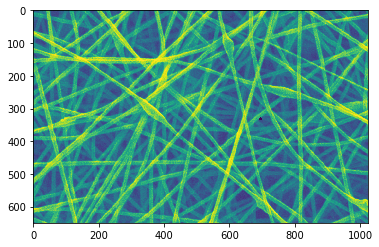

In [9]:
orig = cv2.imread("/home/marilin/Documents/ESP/data/SEM/EcN_II_PEO_131120_GML_15k_03.tif",0)[:650, :]

PATH_1 = cv2.imread("/home/marilin/Documents/ESP/diameterJ_test/sem_test/Segmented Images/EcN_II_PEO_131120_GML_15k_01_S1_reverse.tif",0)[:650, :]

# selecting a pixel that is bordering a black pixel
# make this px as the center of a 13x13 kernel - sanity check and for choosing the direction of the regression line


# choosing 1 white px - edges should be fixed 
# while 1:
#     rnd_idx = np.random.randint(1, (len(np.where(PATH_1 > 0)[0]))-1, 1)
#     x, y = np.where(PATH_1 > 0)[0][rnd_idx][0], np.where(PATH_1 > 0)[1][rnd_idx][0]
#     # neighboring px-s from white should be black (U+L, U+R / B+L, B+R) but majority of kernel should be white

#     # relative to px pos
 
#     U = PATH_1[x-1][y]
#     R = PATH_1[x][y+1]
#     L = PATH_1[x][y-1]
#     B = PATH_1[x+1][y]

#     # safe check 
#     if (U == 0 and L == 0) or (U == 0 and R == 0) or (B == 0 and L == 0) or (B == 0 and R == 0):
#         # kernel edge length
#         n = 13
#         #Creating a 13x13 kernel where x,y is the midpoint 
#         kernel_1 = PATH_1[x-(n//2):x+(n//2+1), y-(n//2):y+(n//2+1)]

#         if np.count_nonzero(kernel_1) > ((n**2) // 2):
#             break


# print(x,y)

# on the img reversed 
x,y = 332, 695

# distance transform
dist = cv2.distanceTransform(PATH_1, cv2.DIST_L2, 3)
# Normalize the distance image for range = {0.0, 1.0}
# so we can visualize and threshold it
cv2.normalize(dist, dist, 0, 1.0, cv2.NORM_MINMAX)
plt.imshow(cv2.cvtColor(dist, cv2.COLOR_BGR2RGB))
# how can i find perpendicularity from one px? (along on diag? - towards the direction of more whites? - if same, then look 
# at the general direction of whites?)
# 4 diagonals possible - the quarter with the most whites wins?


n = 13
# #Creating a 13x13 kernel where x,y is the midpoint 
kernel_1 = PATH_1[x-(n//2):x+(n//2+1), y-(n//2):y+(n//2+1)]
print(kernel_1)
# # find biggest sum
# UL = np.sum(kernel_1[:n//2, :n//2])
# UR = np.sum(kernel_1[:n//2:, n//2+1:])
# LL = np.sum(kernel_1[n//2+1:, :n//2])
# LR = np.sum(kernel_1[n//2+1:, n//2+1:])

#print(np.argmax(np.array([UL, UR, LL, LR])))

# 4th quarter - np.diag



# px distance in diagonals 



orig = cv2.circle(orig, (y,x), radius=4, color=(0, 0, 255), thickness=-1)
#print(np.count_nonzero(PATH_1))
#cv2.imshow("direction", theta)
plt.imshow(PATH_1)
plt.imshow(orig)

[660.34705835]


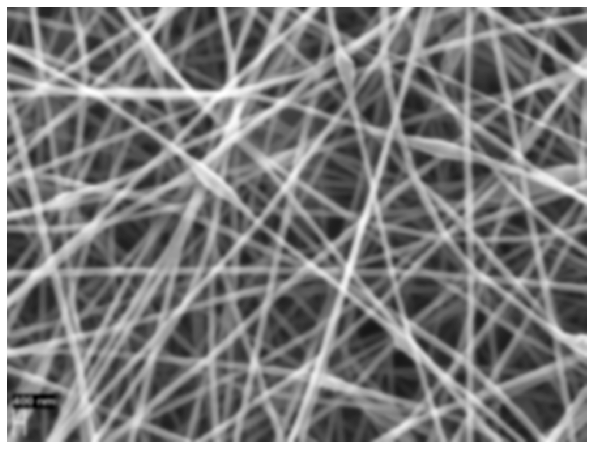

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters, measure, morphology
from scipy import ndimage 

# Load image
image = io.imread("/home/marilin/Documents/ESP/data/SEM/EcN_II_PEO_131120_GML_15k_03.tif")

# Preprocessing
image = filters.gaussian(image, sigma=0.5)  # adjust sigma value
binary = filters.threshold_local(image, block_size=21, method='gaussian')  # adaptive thresholding

#binary = morphology.binary_closing(binary)  # closing operation
#binary = morphology.remove_small_objects(binary, min_size=500)  # remove small objects

# Skeletonization
skeleton = morphology.skeletonize(binary)

# Distance transform
distance = ndimage.distance_transform_edt(binary)

# Labeling and measuring
label = measure.label(skeleton)  # labeling
properties = measure.regionprops_table(label, intensity_image=distance, properties=('label', 'area', 'equivalent_diameter', 'mean_intensity'))

# Extract diameter information
#diameters = np.array(properties['equivalent_diameter']) * np.sqrt(2)  # convert to diameter
#areas = np.array(properties['area'])
#intensities = np.array(properties['mean_intensity'])

nano_per_px = 400 / 22
#diameters = np.array(properties['equivalent_diameter']) * 2*nano_per_px

print(diameters)

# Plot results

fig, ax = plt.subplots(figsize=(16,8))
ax.imshow(binary, cmap='gray')
#for i in range(len(diameters)):
#    if diameters[i] > 0:  # ignore small objects
#        center = measure.regionprops_table(label, intensity_image=image, properties=('centroid'))[i]['centroid']
#        ax.text(center[1], center[0], f"{diameters[i]:.2f} um", color='r', ha='center', va='center', fontsize=10)
ax.axis('off')
plt.show()


In [ ]:
# options 
# enhance contrast, removal of noise 
# huang thresholding 
# edge-based detection 
# Region-based segmentation: the image is divided into regions based on the properties of the pixels within those regions. 
# Regions that are likely to contain fibers are then selected and segmented.

# ml: can learn to identify fibers based on a training set of labeled images.

In [29]:
import numpy as np
import cv2 
import os 
import difflib
import matplotlib.pyplot as plt
import imagej
import scyjava as sj

for k, v in os.environ.items():
	if k.startswith("QT_") and "cv2" in v:
	    del os.environ[k]


# https://pyimagej.readthedocs.io/en/latest/Initialization.html
PATH_1 = "/home/marilin/Documents/ESP/data/SEM/EcN_II_PEO_131120_GML_15k_01.tif"
plugins_dir = '/home/marilin/Documents/ESP/diameterJ_test/ImageJ/plugins/DiameterJ/'

sj.config.add_option(f'-Dplugins.dir={plugins_dir}')

ij = imagej.init('sc.fiji:fiji')
# load a sample image
image = ij.io().open(PATH_1)

if ij.WindowManager.getIDList() is None:
    ij.py.run_macro('newImage("dummy", "8-bit", 1, 1, 1);')

# imageplus 
imp = ij.py.to_imageplus(image)
threshImage = imp 

tHuang = ij.op().threshold().huang(threshImage)
tIJ1 = ij.op().threshold().ij1(threshImage) 
tIntermodes = ij.op().threshold().intermodes(threshImage)
tIsoData = ij.op().threshold().isoData(threshImage)
tLi = ij.op().threshold().li(threshImage)
tMaxEntropy = ij.op().threshold().maxEntropy(threshImage)
tMaxLikelihood = ij.op().threshold().maxLikelihood(threshImage)
tMean = ij.op().threshold().mean(threshImage)
tMinError = ij.op().threshold().minError(threshImage)
tMinimum = ij.op().threshold().minimum(threshImage)
tMoments = ij.op().threshold().moments(threshImage)
tOtsu = ij.op().threshold().otsu(threshImage)
tPercentile = ij.op().threshold().percentile(threshImage)
tRenyiEntropy = ij.op().threshold().renyiEntropy(threshImage)
tRosin = ij.op().threshold().rosin(threshImage)
tShanbhag = ij.op().threshold().shanbhag(threshImage)
tTriangle = ij.op().threshold().triangle(threshImage)
tYen = ij.op().threshold().yen(threshImage)

ij.notebook().display([
    [["huang":tHuang, "ij1":tIJ1, "intermodes":tIntermodes, "isodata":tIsoData, "li":tLi, "max entropy":tMaxEntropy]],
    [["max likelihood":tMaxLikelihood, "mean":tMean, "min error":tMinError, "minimum":tMinimum, "moments":tMoments, "otsu":tOtsu]],
    [["percentile":tPercentile, "renyi entropy":tRenyiEntropy, "rosin":tRosin, "shanbhag":tShanbhag, "triangle":tTriangle, "yen":tYen]]
])

SyntaxError: invalid syntax (3228578530.py, line 51)